# The "Tarantino Dataset" by FiveThirtyEight 
### A Complete Catalog Of Every Time Someone Cursed Or Was Killed In A Quentin Tarantino Movie
https://www.kaggle.com/datasets/fivethirtyeight/cuss-words-and-deaths-in-quentin-tarantino-films

In [2]:
import pandas as pd
import numpy as np 
import re   
import warnings
warnings.filterwarnings('ignore')  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale 
sns.set(rc={'figure.figsize':(17,7)}) 
plt.style.use('fivethirtyeight') # 

In [3]:
df=pd.read_csv('tarantino_csv.csv') 
df=df.fillna('') 
print(df.info())
df 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       1894 non-null   object 
 1   type        1894 non-null   object 
 2   word        1894 non-null   object 
 3   minutes_in  1894 non-null   float64
dtypes: float64(1), object(3)
memory usage: 59.3+ KB
None


,movie,type,word,minutes_in
0,reservoir dogs,word,dick,0.40
1,reservoir dogs,word,dicks,0.43
2,reservoir dogs,word,fucked,0.55
3,reservoir dogs,word,fucking,0.61
4,reservoir dogs,word,bullshit,0.61
...,...,...,...,...
1889,jackie brown,word,motherfucker,141.93
1890,jackie brown,word,ass,142.43
1891,jackie brown,word,fucking,142.47
1892,jackie brown,word,goddamn,142.97


In [4]:
top_words=df.loc[df['type']=='word']['word'].value_counts()[:9] 
top_words

fucking         407
shit            221
fuck            213
n-word          179
ass             140
goddamn         113
motherfucker     70
bitch            64
hell             45
Name: word, dtype: int64

In [5]:
dfWords=df.loc[df['word'].isin(top_words.index)] 
dfWords.head()

,movie,type,word,minutes_in
3,reservoir dogs,word,fucking,0.61
5,reservoir dogs,word,fuck,0.66
6,reservoir dogs,word,shit,0.90
7,reservoir dogs,word,fuck,1.43
9,reservoir dogs,word,fuck,1.66


<AxesSubplot:xlabel='movie', ylabel='swears count'>

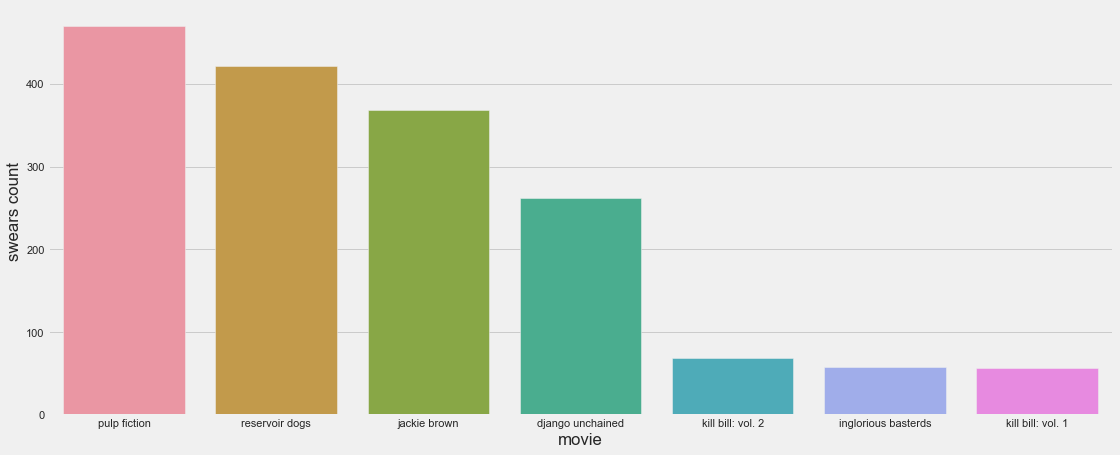

In [6]:
wgroup=df.loc[df['type']=='word'].groupby('movie', as_index=False).count()
wgroup['swears count']=wgroup['type']
wgroup=wgroup[['movie','swears count']] 
wgroup.sort_values('swears count', ascending=False, inplace=True)

sns.barplot(data=wgroup, x='movie', y='swears count')

Text(0.5, 1.0, 'SWEAR DISTRIBUTION')

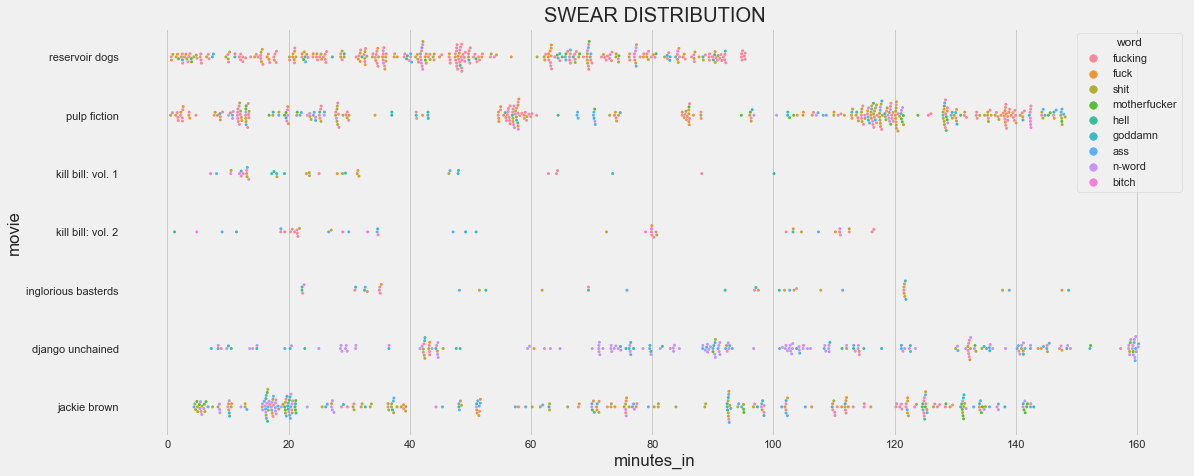

In [7]:
sns.swarmplot(data=dfWords, x="minutes_in", y="movie", hue='word', size=3).set_title("SWEAR DISTRIBUTION")

Text(0.5, 1.0, 'SWEAR COUNTS HISTOGRAM')

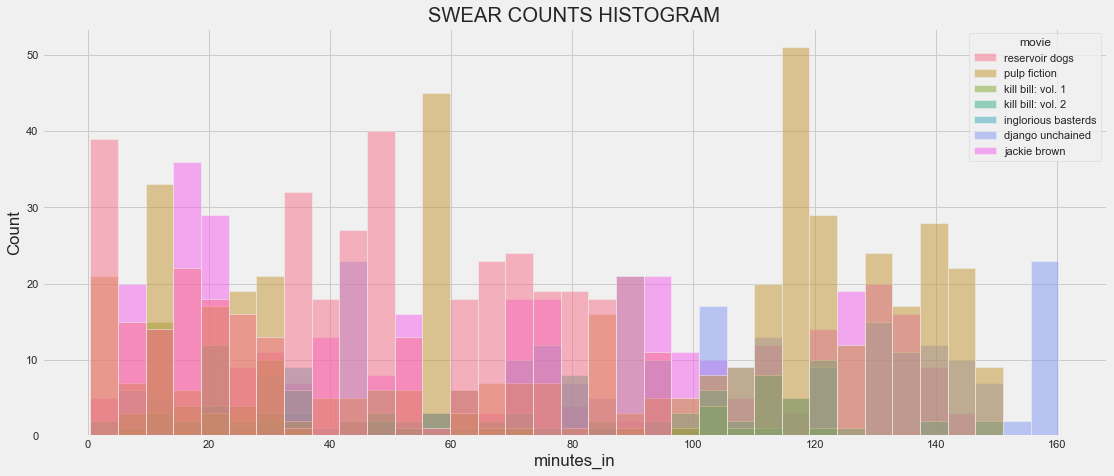

In [8]:
sns.histplot(data=df.loc[df['type']=='word'], x="minutes_in", hue='movie', bins=35 ).set_title("SWEAR COUNTS HISTOGRAM")

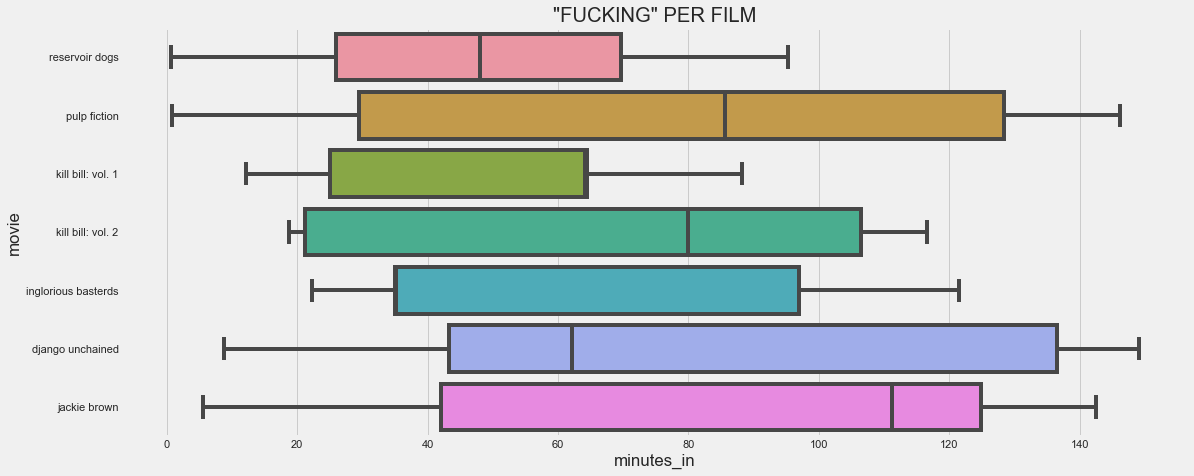

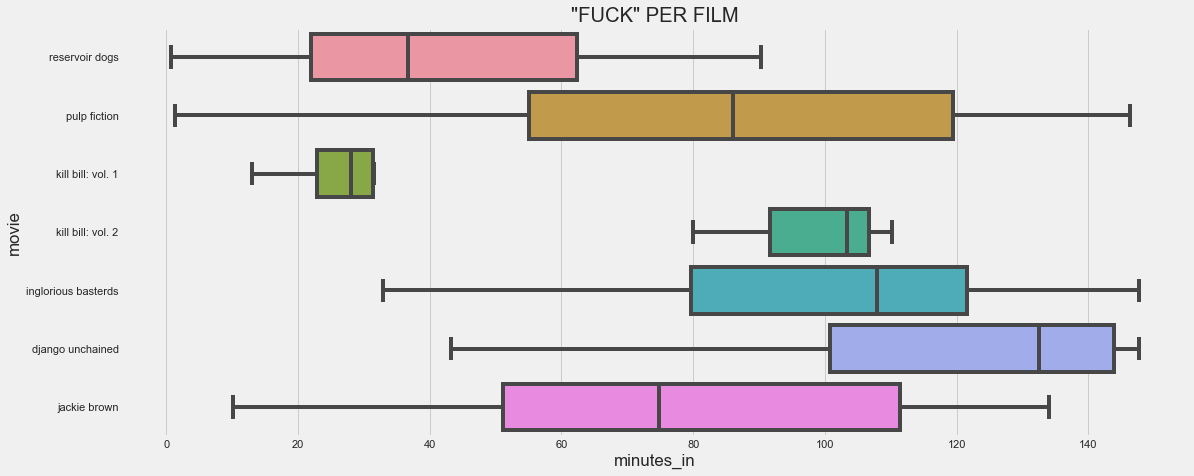

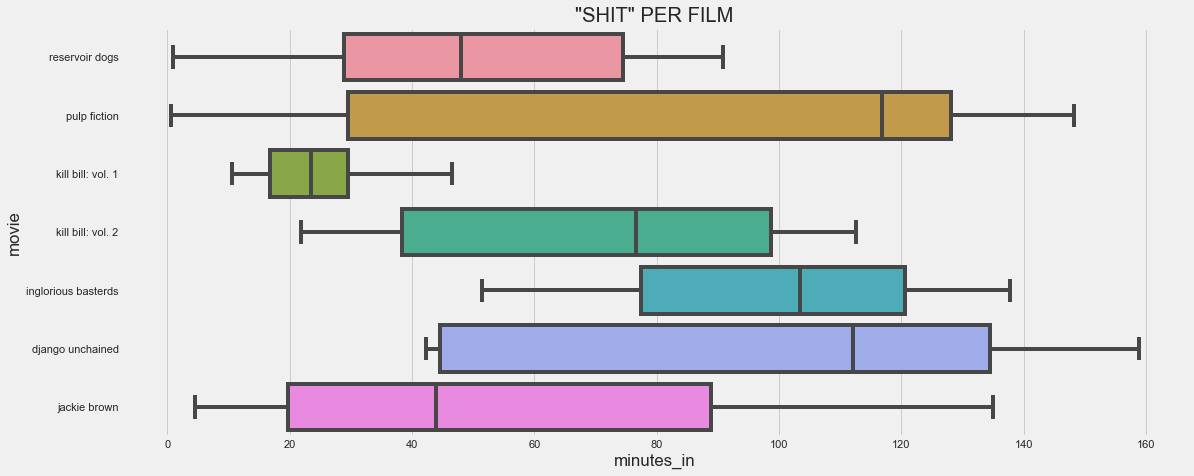

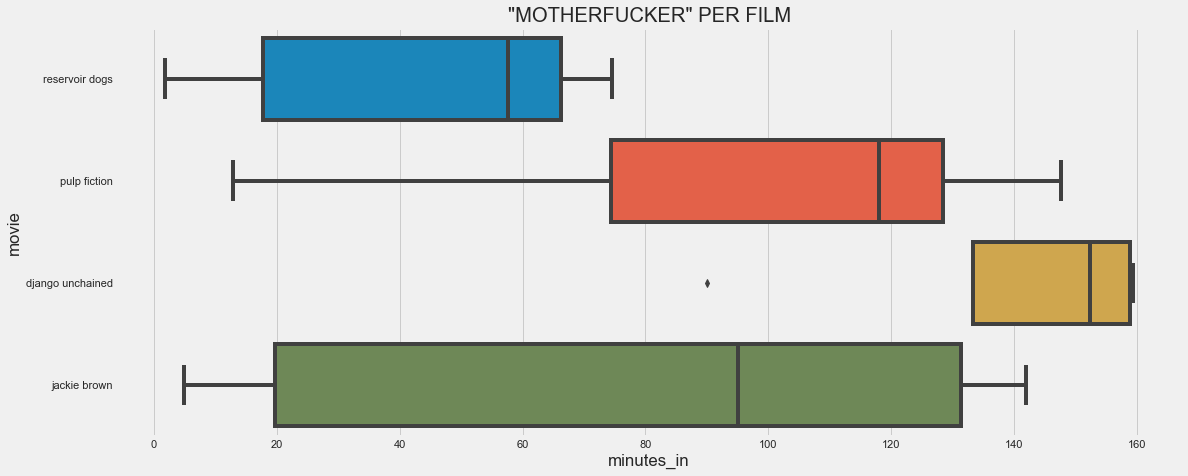

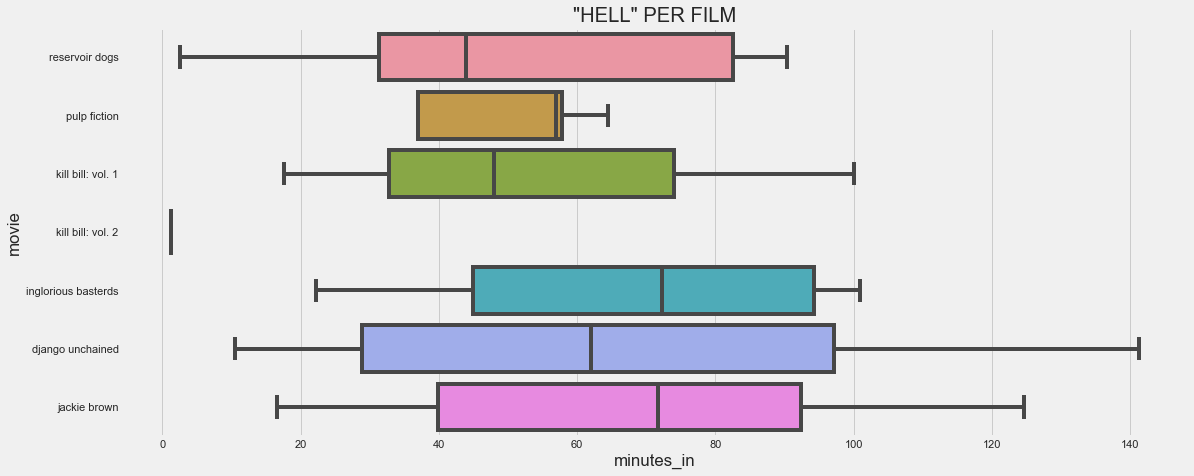

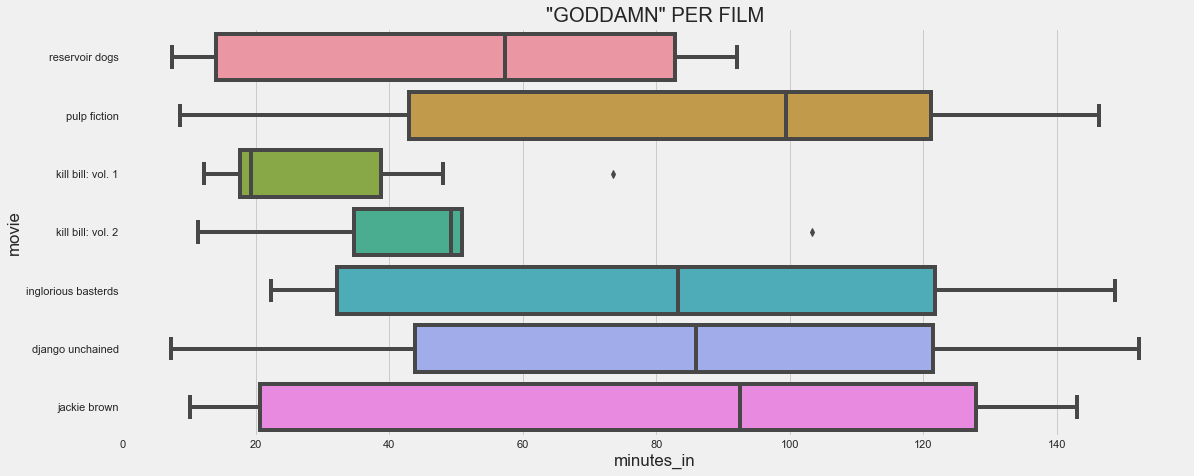

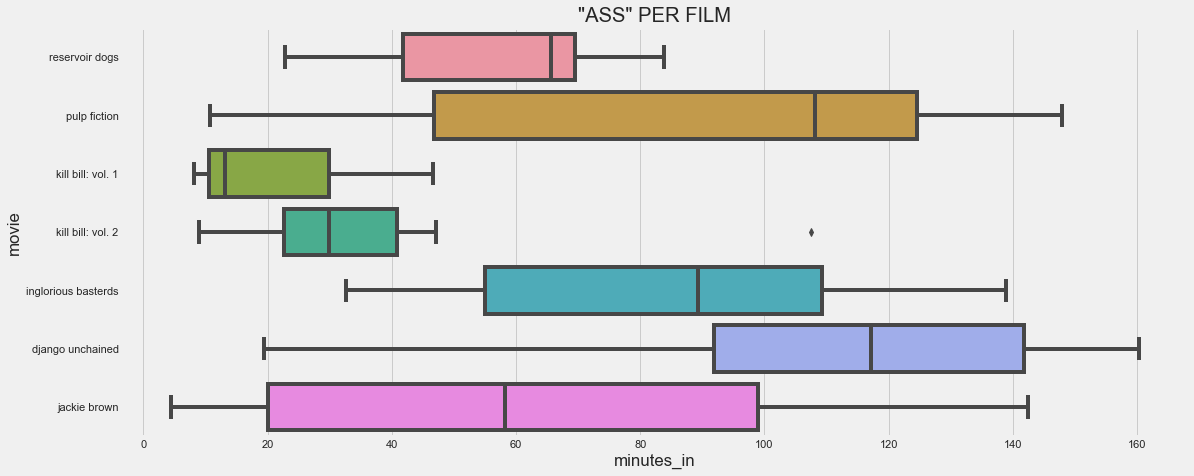

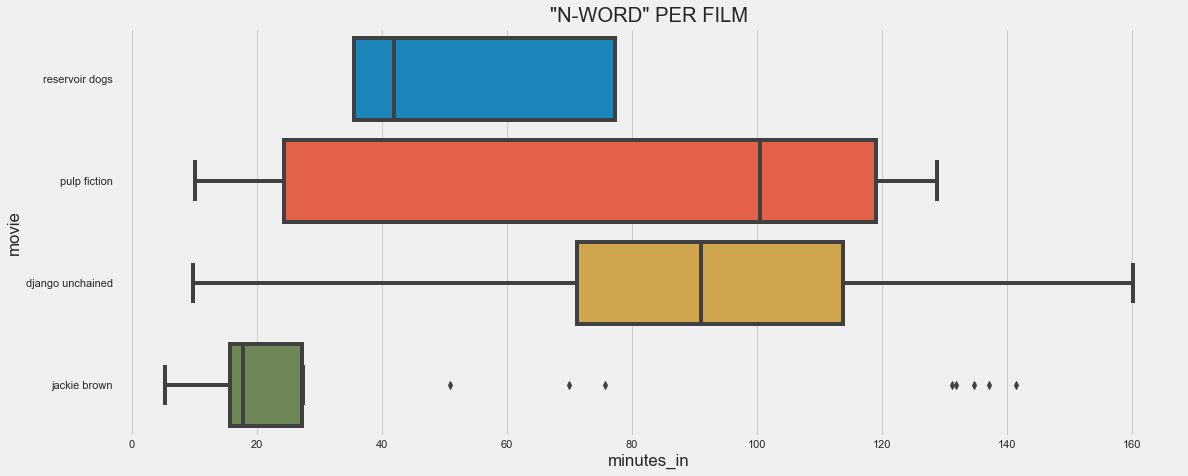

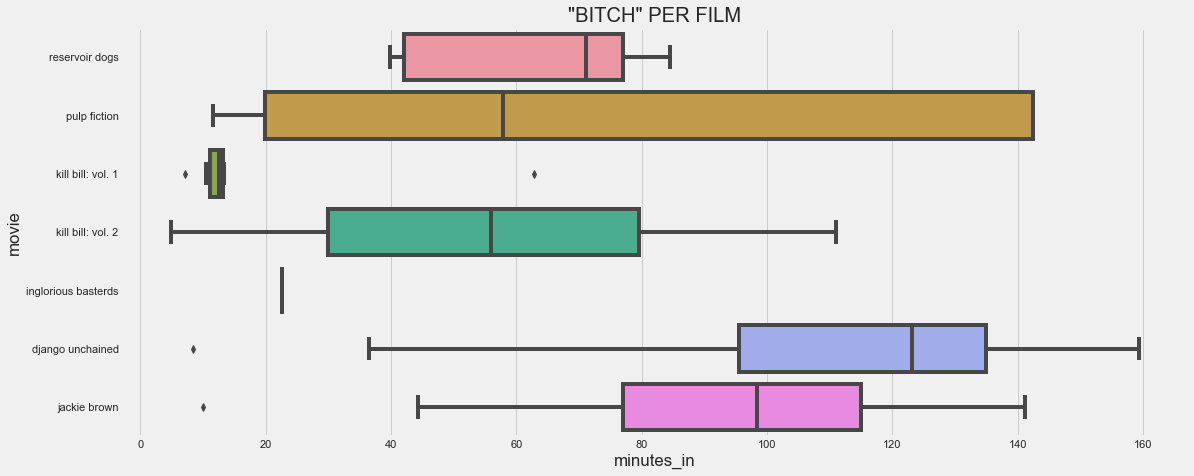

In [9]:
for w in dfWords['word'].unique(): 
    d = df.loc[df['word']==w] 
    plt.figure(w)
    sns.boxplot(data=d , x='minutes_in', y='movie').set_title( f'"{w.upper()}" PER FILM')

# DEATH

<AxesSubplot:xlabel='movie', ylabel='death count'>

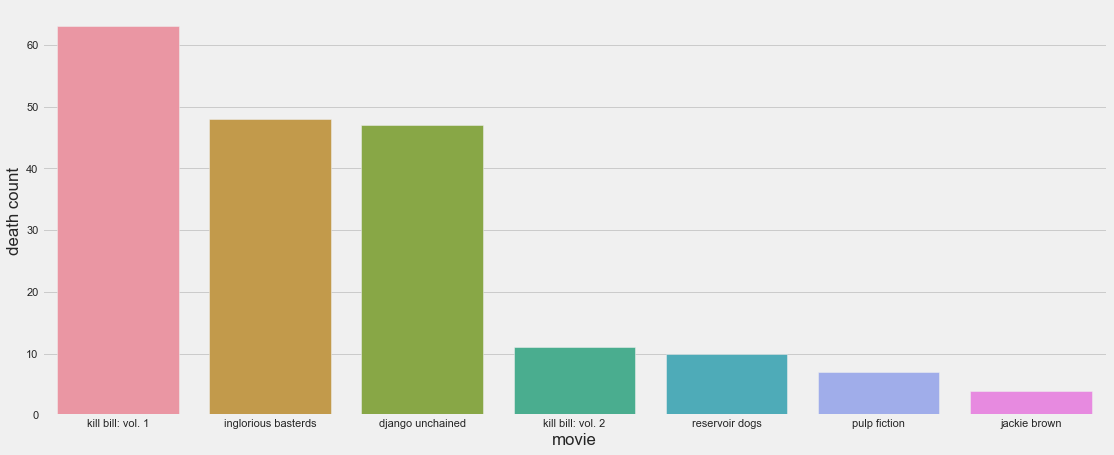

In [10]:
group=df.loc[df['type']=='death'].groupby('movie', as_index=False).count()
group.sort_values('type', inplace=True, ascending=False) 
group['death count']=group['type'] 
sns.barplot(data=group, y='death count', x='movie' )

Text(0.5, 1.0, 'DEATH BY MINUTES IN')

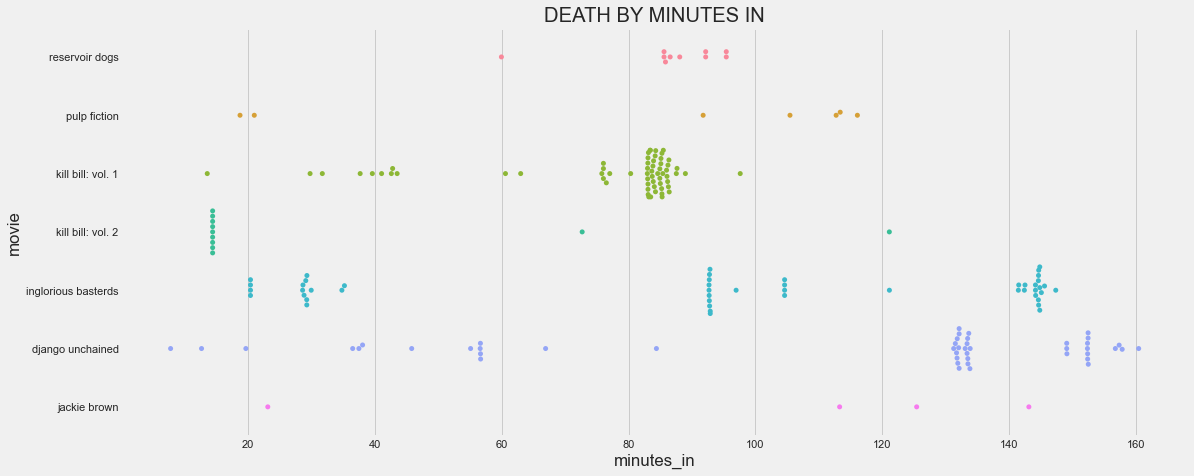

In [11]:
death=df.loc[df['type']=='death']
sns.swarmplot(data=death, x="minutes_in", y="movie").set_title('DEATH BY MINUTES IN')

Text(0.5, 1.0, 'DEATH COUNTS ALL FILMS')

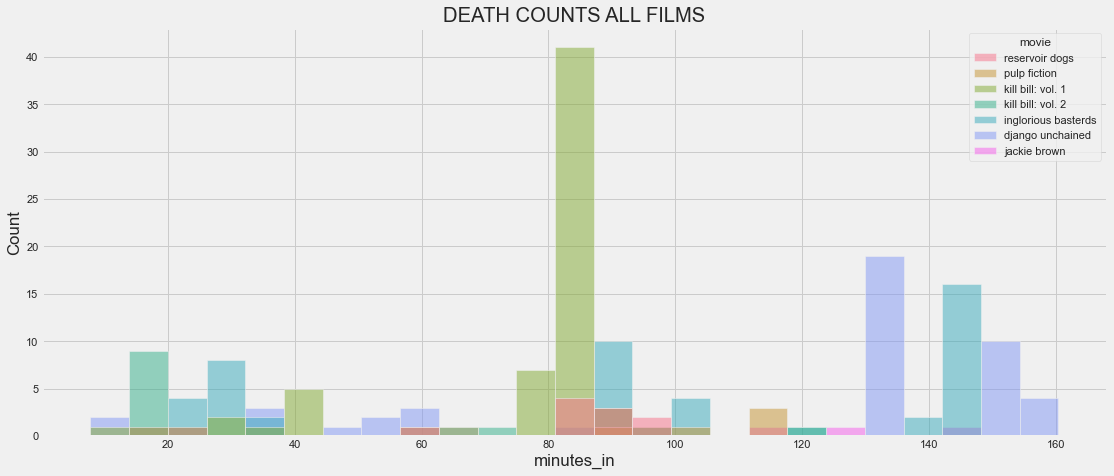

In [12]:
sns.histplot(data=df.loc[df['type']=='death'], x="minutes_in", hue='movie', bins=25 ).set_title("DEATH COUNTS ALL FILMS")

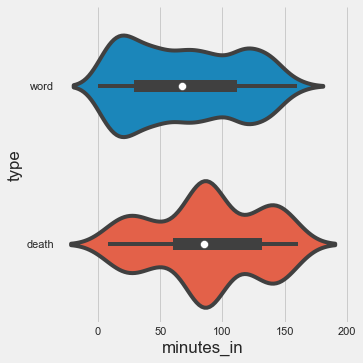

In [13]:
sns.catplot(data=df, x="minutes_in", y='type', kind='violin')

Text(0.5, 1.0, 'DEATH/SWEAR CORRELATION SCATTER')

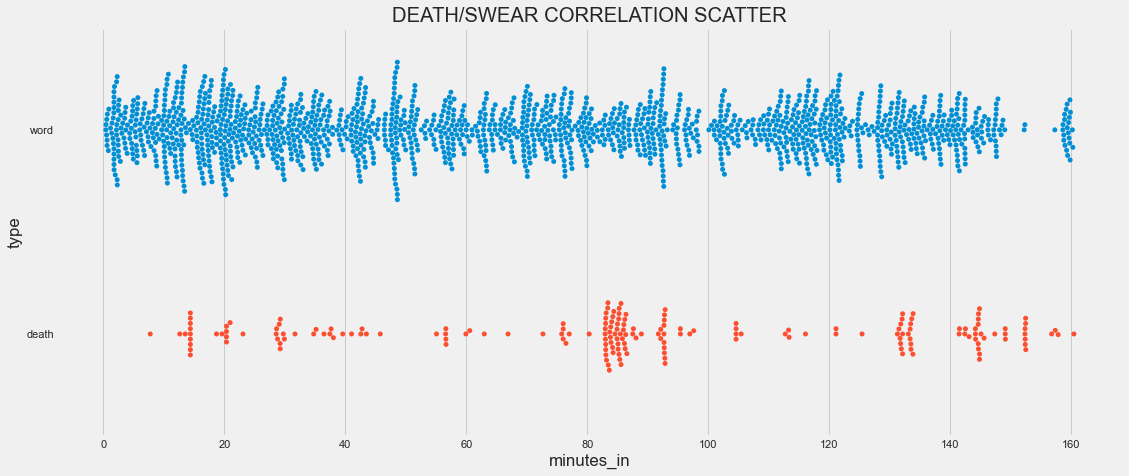

In [14]:
sns.swarmplot(data=df, x="minutes_in", y='type').set_title('DEATH/SWEAR CORRELATION SCATTER')

Text(0.5, 1.0, 'DEATH/SWEAR CORRELATION SCATTER')

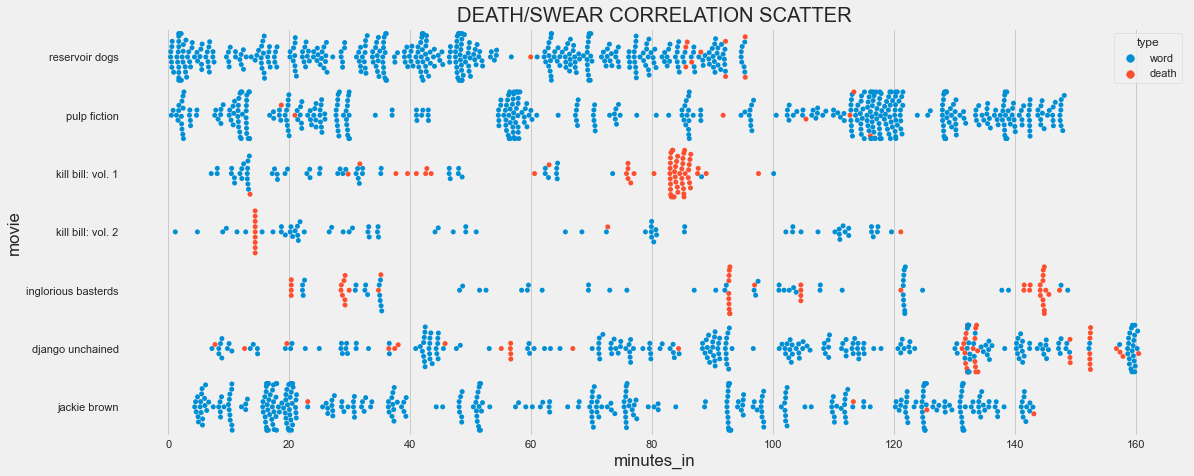

In [15]:
 
sns.swarmplot(data=df, x="minutes_in", y="movie", hue='type').set_title('DEATH/SWEAR CORRELATION SCATTER')
 

In [30]:
dfn=df.copy()
dfn['nminutes_in']=0
for m in dfn.movie.unique():
     d=dfn.loc[dfn.movie==m]
     dfn.loc[dfn.movie==m,'nminutes_in'] = minmax_scale(d['minutes_in'], feature_range=(0,1)) 

Text(0.5, 1.0, 'NORMALIZED MINUTES IN')

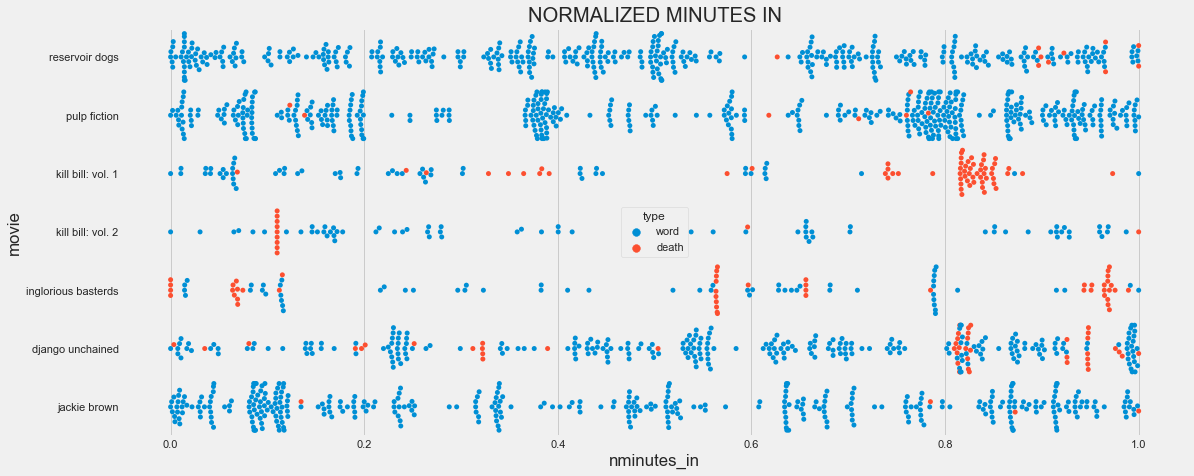

In [31]:
sns.swarmplot(data=dfn, x="nminutes_in", y='movie', hue='type').set_title('NORMALIZED MINUTES IN')

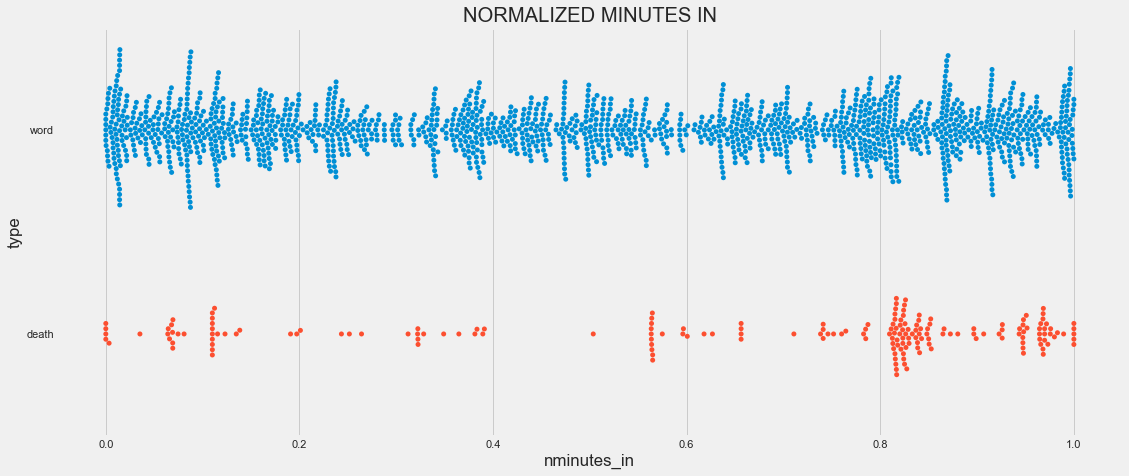

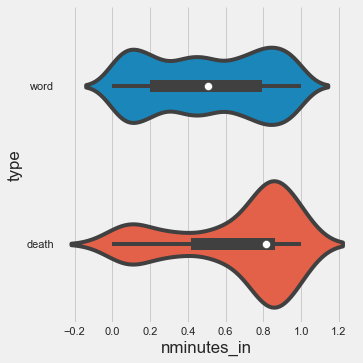

: 

In [32]:
sns.swarmplot(data=dfn, x="nminutes_in", y='type' ).set_title('NORMALIZED MINUTES IN')
sns.catplot(data=dfn, x="nminutes_in", y='type', kind='violin' ) 